In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [3]:
filenames = ['df_t0_ratio.csv','df_t0_ratio_repeat.csv', 'df_t30_ratio.csv',
             'df_t60_ratio.csv','df_t90_ratio.csv', 'df_t120_ratio.csv']
# Create list of filenames to be read

dataframes = [pd.read_csv(file) for file in filenames]
# Use list comprehension to generate list of read dataframes

df_mean = dataframes[0][['Condition', 'Mean Ratio']]
# Create the an initial dataframe by taking the slug identity and and '0' columns of the t0 data.


for file in dataframes[1:]:
        df_mean = pd.concat([df_mean, file['Mean Ratio']],
                       axis=1, ignore_index=True)
# Concatenate subsequent dataframe's 'Averaged Vinyl Divide Aromatic' column along the columns axis and ignore the index.
        
col_names = {0:'Condition',
            1:'t0_mean',
            2:'t0_mean_repeat', 
            3:'t30_mean',
            4:'t60_mean',
            5:'t90_mean',
            6:'t120_mean'}
df_mean.rename(columns=col_names, inplace=True)
# Rename columns

df_mean
# Check df_mean

,Condition,t0_mean,t0_mean_repeat,t30_mean,t60_mean,t90_mean,t120_mean
0,1,1.105429,1.046181,1.033254,0.834292,0.793005,0.747428
1,2,1.098075,1.018213,0.973438,0.807316,0.735534,0.681059
2,3,1.116215,1.051447,0.926365,0.801188,0.651005,0.576381
3,4,1.556431,1.465091,1.305000,1.252507,1.118009,1.049088
4,5,1.700975,1.574196,1.369236,1.274837,1.086568,1.043222
5,6,1.739615,1.649495,1.363543,1.173810,0.944667,0.842461
6,7,2.309300,2.217069,1.936209,1.759394,1.504519,1.429793
7,8,2.529558,2.496198,2.020503,1.765569,1.493556,1.342842
8,9,2.706747,2.384331,1.921519,1.506035,1.286809,1.165279


In [4]:
df_std = dataframes[0][['Condition', 'Standard Deviation']]

for file in dataframes[1:]:
        df_std = pd.concat([df_std, file['Standard Deviation']], axis=1, ignore_index=True)
        
col_names = {0:'Condition',
            1:'t0_std',
            2:'t0_std_repeat', 
            3:'t30_std',
            4:'t60_std',
            5:'t90_std',
            6:'t120_std'}
df_std.rename(columns=col_names, inplace=True)
# Rename columns

df_std
# Check df_std

,Condition,t0_std,t0_std_repeat,t30_std,t60_std,t90_std,t120_std
0,1,0.016730,0.012273,0.018504,0.025710,0.035387,0.027707
1,2,0.013623,0.019222,0.021187,0.027491,0.016499,0.025193
2,3,0.029825,0.017525,0.024376,0.012983,0.025769,0.027442
3,4,0.016901,0.032563,0.027308,0.025390,0.033236,0.022227
4,5,0.024113,0.025822,0.038830,0.026955,0.029531,0.019766
5,6,0.015611,0.021246,0.044423,0.027581,0.026925,0.029281
6,7,0.069936,0.038730,0.035218,0.038226,0.039192,0.024199
7,8,0.050918,0.034869,0.047093,0.052740,0.040962,0.034083
8,9,0.042771,0.036053,0.041394,0.030100,0.039720,0.041164


In [5]:
# Express the Mean and Std of the Ratios and append them in a list.
l_t0=[]
for i in range(0,9):
    l_t0.append(ufloat(df_mean.loc[i, 't0_mean'], df_std.loc[i, 't0_std']))
    
l_t0_repeat=[]
for i in range(0,9):
    l_t0_repeat.append(ufloat(df_mean.loc[i, 't0_mean_repeat'], df_std.loc[i, 't0_std_repeat']))

l_t30=[]
for i in range(0,9):
    l_t30.append(ufloat(df_mean.loc[i, 't30_mean'], df_std.loc[i, 't30_std']))

l_t60=[]
for i in range(0,9):
    l_t60.append(ufloat(df_mean.loc[i, 't60_mean'], df_std.loc[i, 't60_std']))

l_t90=[]
for i in range(0,9):
    l_t90.append(ufloat(df_mean.loc[i, 't90_mean'], df_std.loc[i, 't90_std']))

l_t120=[]
for i in range(0,9):
    l_t120.append(ufloat(df_mean.loc[i, 't120_mean'], df_std.loc[i, 't120_std']))
    
df_ufloat = pd.DataFrame([l_t0, l_t0_repeat, l_t30, l_t60, l_t90, l_t120]).T
df_ufloat.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_ufloat.rename({1: '0_repeat', 2:30, 3:60, 4:90, 5:120}, inplace=True, axis=1)
df_ufloat

,Condition,0,0_repeat,30,60,90,120
0,1,1.105+/-0.017,1.046+/-0.012,1.033+/-0.019,0.834+/-0.026,0.793+/-0.035,0.747+/-0.028
1,2,1.098+/-0.014,1.018+/-0.019,0.973+/-0.021,0.807+/-0.027,0.736+/-0.016,0.681+/-0.025
2,3,1.116+/-0.030,1.051+/-0.018,0.926+/-0.024,0.801+/-0.013,0.651+/-0.026,0.576+/-0.027
3,4,1.556+/-0.017,1.465+/-0.033,1.305+/-0.027,1.253+/-0.025,1.118+/-0.033,1.049+/-0.022
4,5,1.701+/-0.024,1.574+/-0.026,1.37+/-0.04,1.275+/-0.027,1.087+/-0.030,1.043+/-0.020
5,6,1.740+/-0.016,1.649+/-0.021,1.36+/-0.04,1.174+/-0.028,0.945+/-0.027,0.842+/-0.029
6,7,2.31+/-0.07,2.22+/-0.04,1.936+/-0.035,1.76+/-0.04,1.50+/-0.04,1.430+/-0.024
7,8,2.53+/-0.05,2.496+/-0.035,2.02+/-0.05,1.77+/-0.05,1.49+/-0.04,1.343+/-0.034
8,9,2.71+/-0.04,2.38+/-0.04,1.92+/-0.04,1.506+/-0.030,1.29+/-0.04,1.17+/-0.04


In [6]:
# Create Conversion and Propagated Standard Deviation DataFrame

df_conversion = pd.DataFrame()
df_conversion = pd.concat([df_conversion, df_mean['Condition']], axis=1)

df_conversion[0] = ((1 - (df_mean.iloc[:,1]/ df_mean.iloc[:,1]))*100)

df_conversion[30] = ((1 - (df_mean.iloc[:,3]/ df_mean.iloc[:,1]))*100)

df_conversion[60] = ((1 - (df_mean.iloc[:,4]/ df_mean.iloc[:,1]))*100)

df_conversion[90] = ((1 - (df_mean.iloc[:,5]/ df_mean.iloc[:,1]))*100)

df_conversion[120] = ((1 - (df_mean.iloc[:,6]/ df_mean.iloc[:,2]))*100)

df_conversion

,Condition,0,30,60,90,120
0,1,0.0,6.529130,24.527774,28.262708,28.556529
1,2,0.0,11.350463,26.478964,33.016043,33.112321
2,3,0.0,17.008445,28.222853,41.677467,45.182146
3,4,0.0,16.154364,19.527009,28.168400,28.394368
4,5,0.0,19.502871,25.052546,36.120861,33.729853
5,6,0.0,21.618110,32.524731,45.696760,48.926124
6,7,0.0,16.156000,23.812680,34.849552,35.509770
7,8,0.0,20.124286,30.202456,40.955855,46.204493
8,9,0.0,29.009998,44.359966,52.459194,51.127636


In [7]:
df_errorprop = pd.DataFrame()
df_errorprop = pd.concat([df_errorprop, df_ufloat['Condition']], axis=1)

df_errorprop[0] = ((1 - (df_ufloat.iloc[:,1]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[30] = ((1 - (df_ufloat.iloc[:,3]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[60] = ((1 - (df_ufloat.iloc[:,4]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[90] = ((1 - (df_ufloat.iloc[:,5]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[120] = ((1 - (df_ufloat.iloc[:,6]/ df_ufloat.iloc[:,2]))*100)

df_errorprop

,Condition,0,30,60,90,120
0,1,0.0+/-0,6.5+/-2.2,24.5+/-2.6,28.3+/-3.4,28.6+/-2.8
1,2,(0.0+/-1.9)e-16,11.4+/-2.2,26.5+/-2.7,33.0+/-1.7,33.1+/-2.8
2,3,0.0+/-0,17.0+/-3.1,28.2+/-2.2,41.7+/-2.8,45.2+/-2.8
3,4,0.0+/-0,16.2+/-2.0,19.5+/-1.9,28.2+/-2.3,28.4+/-2.2
4,5,0.0+/-0,19.5+/-2.6,25.1+/-1.9,36.1+/-2.0,33.7+/-1.7
5,6,0.0+/-0,21.6+/-2.6,32.5+/-1.7,45.7+/-1.6,48.9+/-1.9
6,7,0.0+/-0,16.2+/-3.0,23.8+/-2.8,34.8+/-2.6,35.5+/-1.6
7,8,0.0+/-0,20.1+/-2.5,30.2+/-2.5,41.0+/-2.0,46.2+/-1.6
8,9,0.0+/-0,29.0+/-1.9,44.4+/-1.4,52.5+/-1.6,51.1+/-1.9


In [8]:
error_list = []

for index, rows in df_errorprop.iterrows():
    l = rows.tolist()[1:]
    for element in l:
        error_list.append(element.std_dev)

error_dict = {'c1_error' : error_list[0:5],
            'c2_error' : error_list[5:10],
            'c3_error' : error_list[10:15],
            'c4_error' : error_list[15:20],
            'c5_error' : error_list[20:25],
            'c6_error' : error_list[25:30],
            'c7_error' : error_list[30:35],
            'c8_error' : error_list[35:40],
            'c9_error' : error_list[40:45]}

df_error = pd.DataFrame(error_dict).T
df_error.rename({1: 30, 2:60, 3:90, 4:120}, inplace=True, axis=1)
df_error.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_error

,Condition,0,30,60,90,120
c1_error,1,0.000000e+00,2.191621,2.591136,3.380281,2.777860
c2_error,2,1.935975e-16,2.220913,2.664563,1.717035,2.777849
c3_error,3,0.000000e+00,3.112313,2.242996,2.785332,2.765204
c4_error,4,0.000000e+00,1.976716,1.850620,2.273423,2.198747
c5_error,5,0.000000e+00,2.552108,1.907854,1.958094,1.660825
c6_error,6,0.000000e+00,2.648739,1.697150,1.622651,1.893137
c7_error,7,0.000000e+00,2.961971,2.839655,2.602549,1.568612
c8_error,8,0.000000e+00,2.459891,2.514154,2.008677,1.558533
c9_error,9,0.000000e+00,1.896602,1.417619,1.648537,1.877948


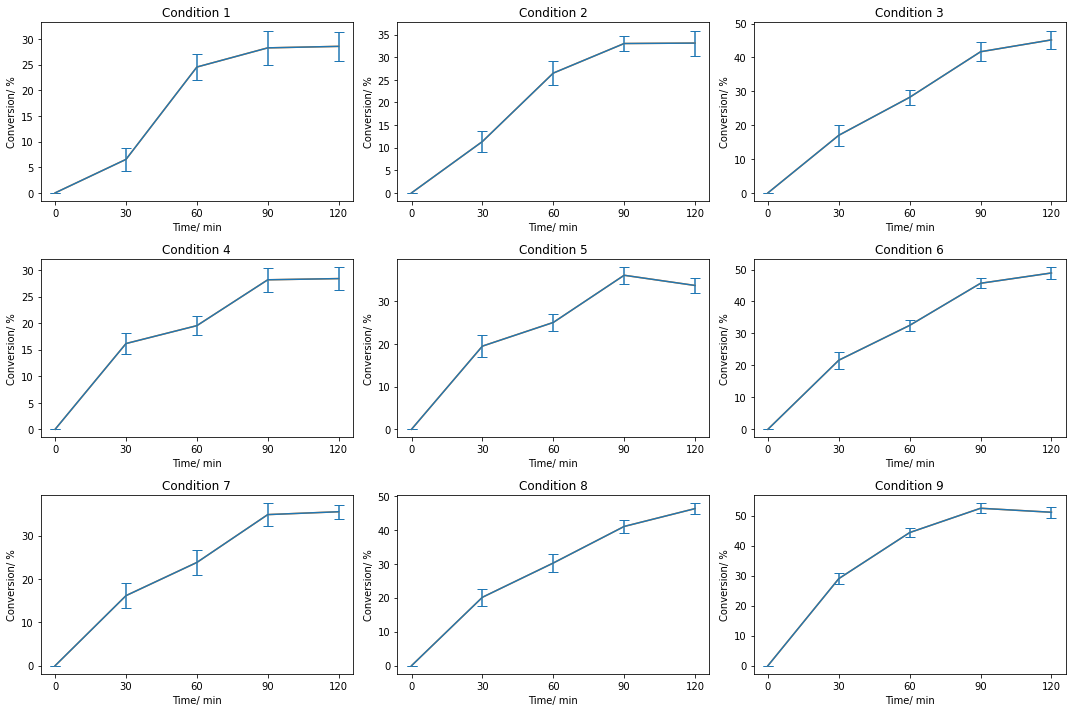

In [9]:
plt.figure(figsize=(15, 10))

for index, rows in df_conversion.iterrows():
    
    x = df_conversion.columns[1:] # Ignore Condition column during plotting
    
    y = rows[1:] # Ignore Condition column during plotting
    
    plt.subplot(3, 3, (1+index))
    
    plt.title('Condition ' + str(1+index))
    # np.round up to 1 d.p. for slug identity, then convert to string.
    
    plt.xlabel('Time/ min')

    plt.ylabel('Conversion/ %')
    
    plt.xticks([0,30,60,90,120]) # Set xticks to relevant time intervals.
    
    plt.errorbar(x, y, error_dict['c'+str(index+1)+'_error'], capsize = 5)
    
    plt.plot(x, y)
    
plt.tight_layout()
plt.show()

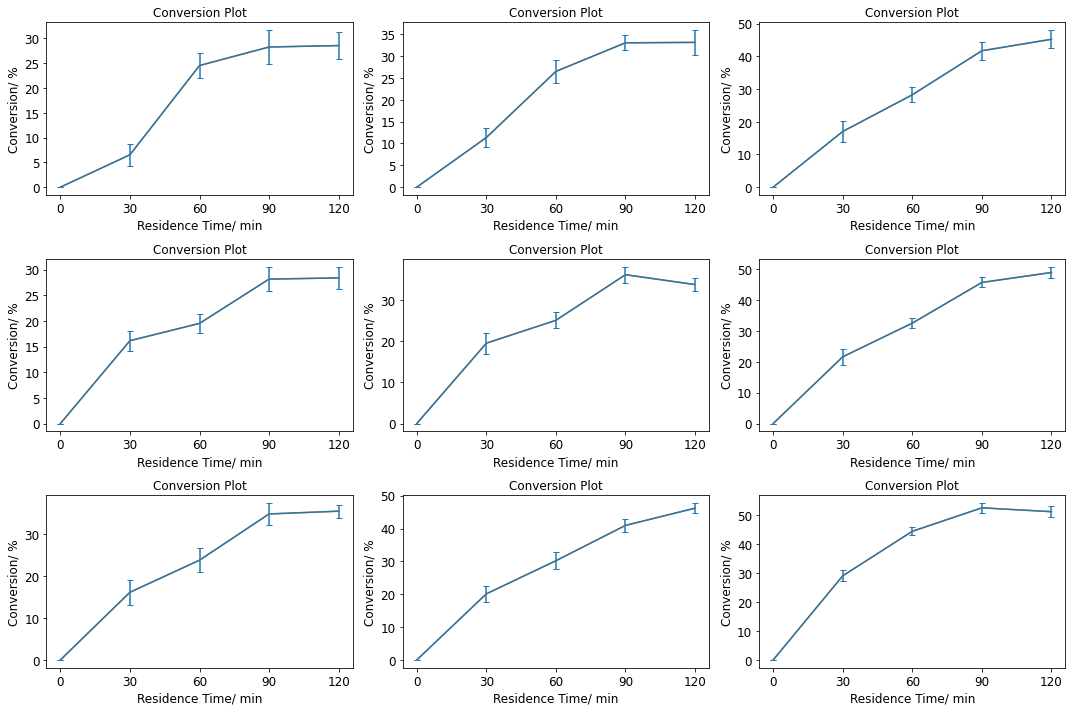

In [10]:
plt.figure(figsize=(15, 10))

for index, rows in df_conversion.iterrows():
    
    x = df_conversion.columns[1:] # Ignore Condition column during plotting
    
    y = rows[1:] # Ignore Condition column during plotting
    
    plt.subplot(3, 3, (1+index))
    
    plt.title('Conversion Plot', fontsize=12)
    # np.round up to 1 d.p. for slug identity, then convert to string.
    
    plt.xlabel('Residence Time/ min', fontsize=12)

    plt.ylabel('Conversion/ %', fontsize=12)
    
    plt.xticks([0,30,60,90,120], fontsize=12) # Set xticks to relevant time intervals.
    
    plt.yticks(fontsize=12)
    
    plt.errorbar(x, y, error_dict['c'+str(index+1)+'_error'], capsize = 3)
    
    plt.plot(x, y)
    
plt.tight_layout()
plt.show()

In [9]:
df_conversion.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_conversion.csv', index=False)

In [10]:
df_error.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_error.csv', index=False)